In [27]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ERROR! Session/line number was not unique in database. History logging moved to new session 176


In [28]:
df = pd.read_json("diffs.json").transpose()
df

,ratingDiff,marginOfVictory,winProb,fav,dog
Georgia St.-Gonzaga,31.13,22,0.98,Gonzaga,Georgia St.
Kentucky-Saint Peter's,22.31,15,0.91,Kentucky,Saint Peter's
Houston-UAB,12.47,8,0.77,Houston,UAB
Baylor-Norfolk St.,26.17,18,0.94,Baylor,Norfolk St.
Longwood-Tennessee,22.76,15,0.92,Tennessee,Longwood
Akron-UCLA,21.36,13,0.88,UCLA,Akron
Montana St.-Texas Tech,20.83,14,0.9,Texas Tech,Montana St.
Auburn-Jacksonville St.,22.21,15,0.91,Auburn,Jacksonville St.
Delaware-Villanova,21.83,14,0.89,Villanova,Delaware
Cal St. Fullerton-Duke,21.61,14,0.9,Duke,Cal St. Fullerton


In [40]:
df['ratingDiff'].astype('float')

Georgia St.-Gonzaga                      31.13
Kentucky-Saint Peter's                   22.31
Houston-UAB                              12.47
Baylor-Norfolk St.                       26.17
Longwood-Tennessee                       22.76
Akron-UCLA                               21.36
Montana St.-Texas Tech                   20.83
Auburn-Jacksonville St.                  22.21
Delaware-Villanova                       21.83
Cal St. Fullerton-Duke                   21.61
Iowa-Richmond                            13.71
Purdue-Yale                              20.06
Texas-Virginia Tech                       2.55
Chattanooga-Illinois                      8.32
Connecticut-New Mexico St.                9.23
Iowa St.-LSU                              5.13
Arkansas-Vermont                          5.95
Murray St.-San Francisco                  1.98
Creighton-San Diego St.                   4.68
Loyola Chicago-Ohio St.                   1.87
Boise St.-Memphis                         0.19
Marquette-Nor

In [41]:
diffs = df['ratingDiff'].astype('float').values
winProb = df['winProb'].astype('float').values

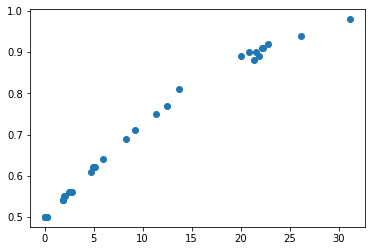

In [30]:
plt.scatter(diffs, winProb)

In [31]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# the function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [60]:
popt, pcov = curve_fit(func, diffs, winProb)

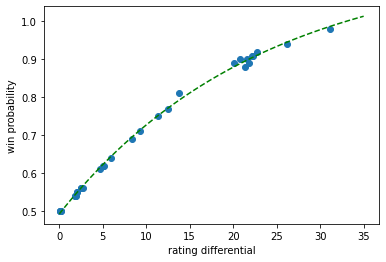

In [61]:
plt.scatter(diffs, winProb)
xvals = np.linspace(0, 35, 100)
plt.plot(xvals, func(xvals, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('rating differential')
plt.ylabel('win probability')
plt.show()

Cool! So we can approximate kenpom's win probability on a neutral court as:

```
-0.66888151 * exp(rating_differential * -0.04322173) + 1.16116838
```

In [56]:
-0.66888151 * np.exp(15 * -0.04322173) + 1.16116838

0.8113965668816993